In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from textstat import flesch_reading_ease
from datasets import load_dataset
import spacy

In [3]:
# Load the dataset
dataset = load_dataset('arrow', data_files='/Users/icon1c/Documents/Semester 2/Natural Language Processing/NLP-Polimi-Project/Practice Models/Rishabh/dataset/train/data-00000-of-00001.arrow')
df = dataset['train'].to_pandas()

In [4]:
# Basic Information
print("Basic Information about the Dataset:")
print(f"Total Documents: {len(df)}")
print(f"Average document length (words): {df['input'].apply(lambda x: len(x.split())).mean()}")

Basic Information about the Dataset:
Total Documents: 33955
Average document length (words): 14.558975114121631


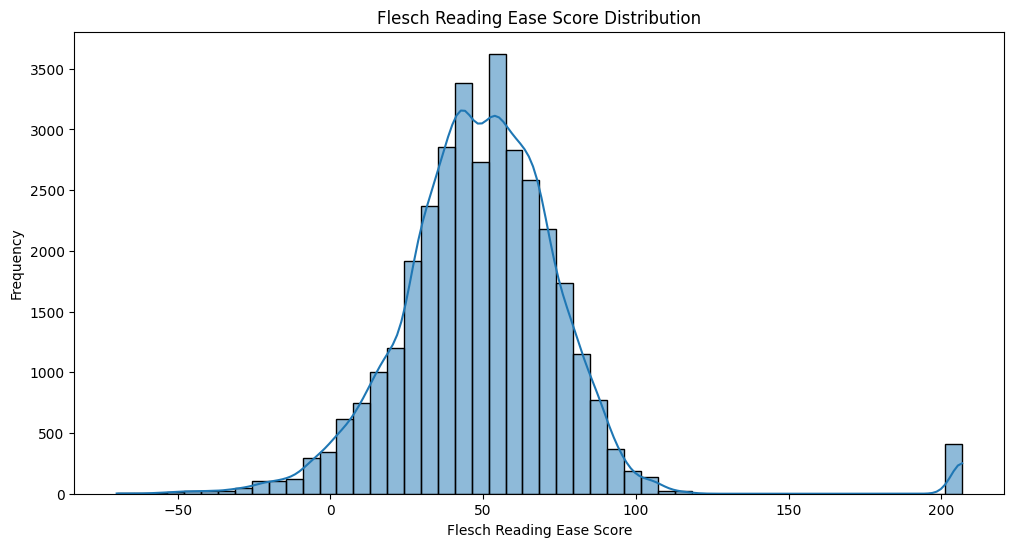

In [5]:
# Text Readability: Flesch Reading Ease
df['flesch_reading_ease'] = df['input'].apply(flesch_reading_ease)
plt.figure(figsize=(12, 6))
sns.histplot(df['flesch_reading_ease'], bins=50, kde=True)
plt.title('Flesch Reading Ease Score Distribution')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Frequency')
plt.show()

In [6]:
# N-grams and Collocations
def get_top_ngrams(corpus, n=None, top_k=20):
    vec = TfidfVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

In [7]:
# Top bigrams and trigrams
top_bigrams = get_top_ngrams(df['input'], n=2)
top_trigrams = get_top_ngrams(df['input'], n=3)
print("Top Bigrams:", top_bigrams)
print("Top Trigrams:", top_trigrams)

Top Bigrams: [('commonly associated', 110.5488227549751), ('recommended treatment', 102.52126117839677), ('medical condition', 100.2594067897726), ('used treat', 99.99531431485302), ('common cause', 84.92869819387322), ('symptoms associated', 70.23776182624107), ('mechanism action', 62.495341567483294), ('common symptoms', 59.8878338763358), ('term used', 58.10312316286337), ('commonly used', 55.65482954863908), ('does affect', 53.920173035669784), ('condition suggested', 50.54076976452948), ('treatment options', 46.397244029502765), ('commonly affected', 45.97204932453484), ('likely diagnosis', 45.41281623825772), ('possible diagnosis', 44.33640907534805), ('adverse effect', 43.788518696180006), ('potential consequence', 43.52427208432963), ('recommended step', 42.788468106146226), ('increased risk', 41.72963288648772)]
Top Trigrams: [('recommended step management', 32.060393208017956), ('condition suggested presence', 31.29602428329383), ('common symptoms associated', 23.116156580361

In [8]:
pip install --upgrade certifi

Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import ssl
import certifi

# Set the environment variable for SSL certificate file
os.environ['SSL_CERT_FILE'] = certifi.where()

# Now, create a new default HTTPS context which uses this certificate
ssl._create_default_https_context = ssl.create_default_context

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')  # This is for the word_tokenize function

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/icon1c/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /Users/icon1c/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
# Part-of-Speech Tagging and Frequency Distribution
df['pos_tags'] = df['input'].apply(lambda x: pos_tag(word_tokenize(x)))
pos_counts = Counter([pos for sublist in df['pos_tags'] for _, pos in sublist])
print("POS Tag Counts:", pos_counts)

POS Tag Counts: Counter({'NN': 108082, 'IN': 64880, 'JJ': 55340, 'DT': 47625, '.': 34002, 'VBZ': 33981, 'WP': 30304, 'NNS': 27994, 'NNP': 18819, 'CC': 16440, 'VBN': 14600, ',': 13140, 'VB': 12744, 'VBP': 11739, 'WDT': 8442, 'TO': 7578, 'RB': 6086, 'WRB': 5860, 'VBG': 5278, 'PRP': 4830, 'MD': 4809, ')': 3508, '(': 3499, 'CD': 2839, 'VBD': 2054, 'PRP$': 1384, 'RBS': 1245, 'POS': 610, 'JJR': 574, "''": 479, '``': 462, 'JJS': 402, 'RBR': 256, ':': 203, 'RP': 197, 'EX': 151, 'FW': 97, 'NNPS': 76, 'PDT': 39, 'WP$': 31, '$': 22, 'UH': 5})


In [19]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.7 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [20]:
import spacy

# Load the installed spaCy model
nlp = spacy.load("en_core_web_sm")

# Proceed with your NER task
df['entities'] = df['input'].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])
entity_counts = Counter([entity for sublist in df['entities'] for entity, _ in sublist])
print("Entity counts:", entity_counts)

Entity counts: Counter({'two': 472, 'first': 402, 'one': 283, 'three': 187, 'second': 101, 'CNS': 96, 'ECG': 89, 'RNA': 80, 'ADH': 77, 'PTH': 75, 'HPV': 65, 'IV': 63, 'CT': 62, 'GI': 61, 'Streptococcus': 59, '1': 59, 'O2': 58, 'third': 53, 'II': 52, 'Plasmodium': 50, 'CSF': 50, 'CMV': 50, 'Staphylococcus': 48, 'Chlamydia': 47, '2': 47, 'hematuria': 46, 'Neisseria': 45, 'Hodgkin': 42, 'HSV': 42, 'ACE': 41, 'TSH': 40, 'AV': 39, 'Clostridium': 39, 'Gram': 39, 'HAART': 39, 'four': 37, 'gram': 37, 'Crohn': 37, 'SIADH': 36, 'NSAIDs': 36, 'Cushing': 34, 'Rickettsia': 34, 'hernia': 34, 'B12': 33, 'EBV': 32, 'BUN': 32, 'the United States': 31, 'HLA': 31, 'Lyme': 31, 'dysphagia': 30, 'CXR': 30, '3': 30, '2nd': 30, 'REM': 29, 'AFP': 29, 'HBV': 29, 'FSH': 28, 'BPH': 28, 'Haemophilus': 28, 'prolactin': 28, 'Entamoeba': 27, 'Wilson': 27, 'Huntington': 27, 'Langerhans': 27, 'atresia': 27, '5': 26, 'Henle': 26, 'LH': 26, 'T3': 25, 'Guillain-Barré': 25, 'Graves': 25, 'Pap': 25, 'GERD': 25, 'T4': 24, 'S

In [21]:
# TF-IDF Analysis
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_result = tfidf.fit_transform(df['input'])
tfidf_df = pd.DataFrame(tfidf_result.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.columns = [str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

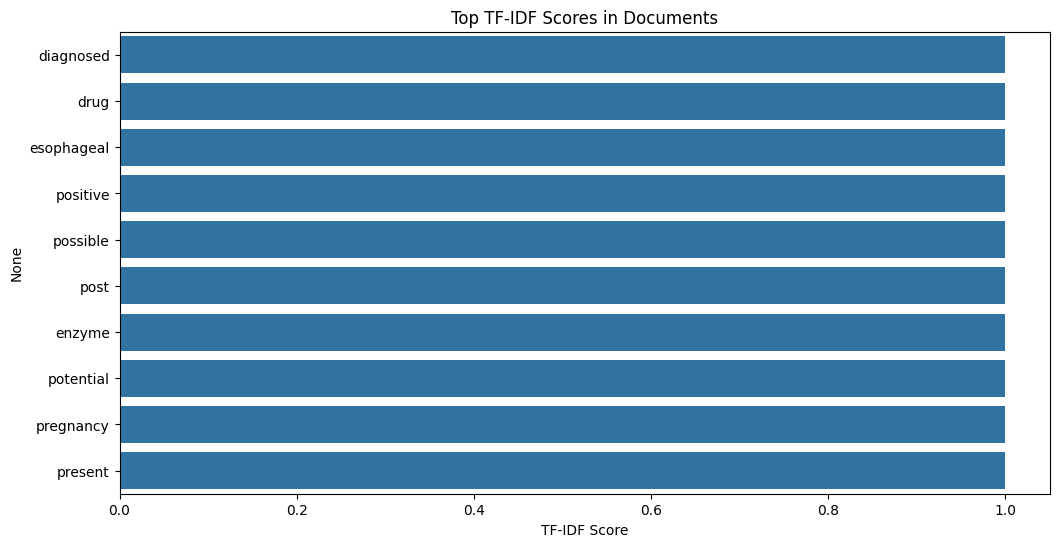

In [22]:
# Visualizing the TF-IDF of the top 10 words
top_n_tfidf = tfidf_df.max().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_n_tfidf.values, y=top_n_tfidf.index)
plt.title('Top TF-IDF Scores in Documents')
plt.xlabel('TF-IDF Score')
plt.show()

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from nltk import FreqDist

In [24]:
# Visualization Setup
plt.style.use('ggplot')

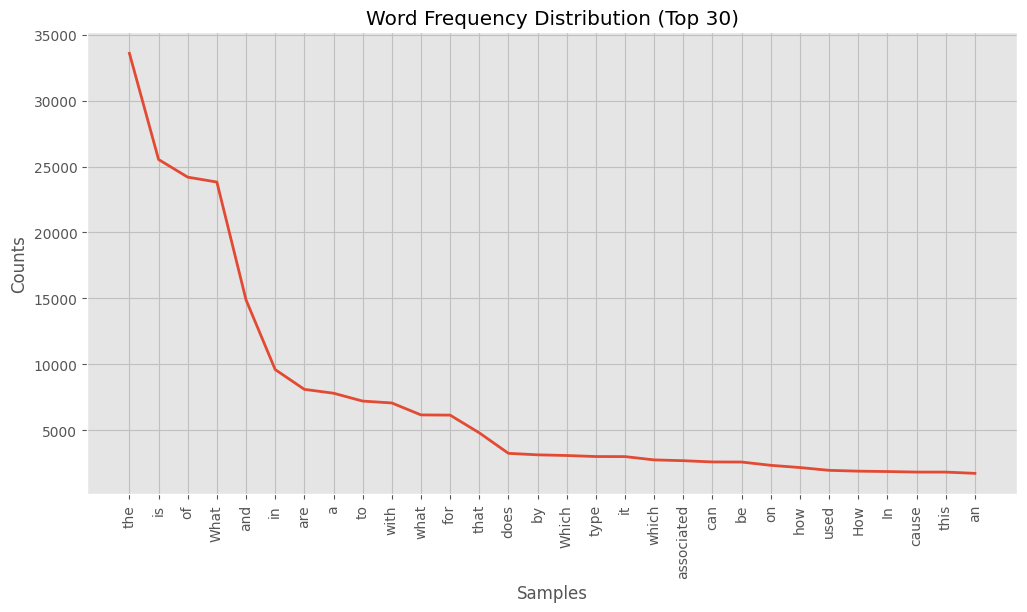

<Axes: title={'center': 'Word Frequency Distribution (Top 30)'}, xlabel='Samples', ylabel='Counts'>

In [25]:
# Word Frequency Distribution
all_words = [word for text in df['input'].apply(lambda x: x.split()) for word in text]
freq_dist = FreqDist(all_words)
plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False, title='Word Frequency Distribution (Top 30)')

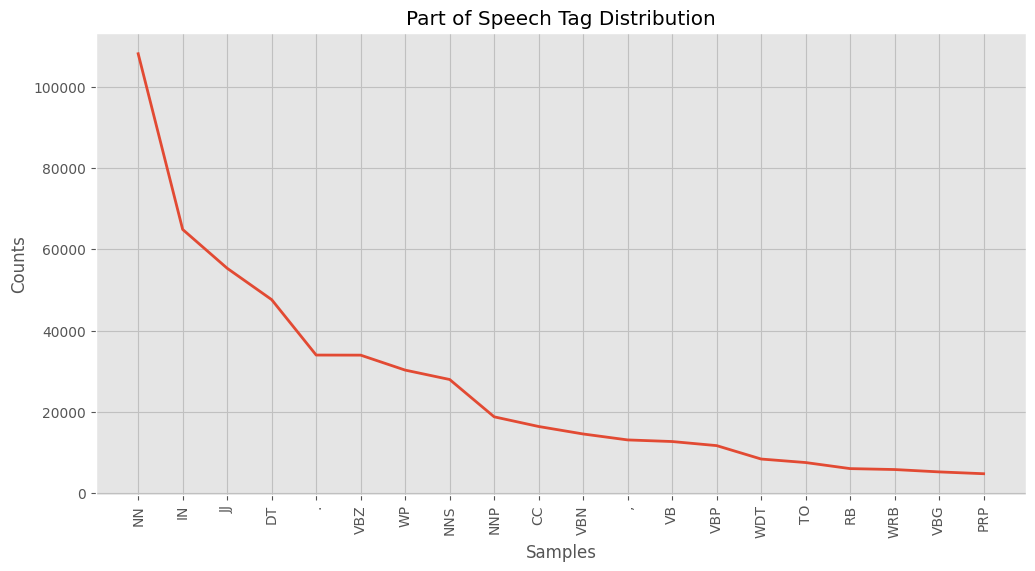

<Axes: title={'center': 'Part of Speech Tag Distribution'}, xlabel='Samples', ylabel='Counts'>

In [26]:
# POS Tag Distribution
pos_tags = [pos for sublist in df['pos_tags'] for _, pos in sublist]
pos_freq_dist = FreqDist(pos_tags)
plt.figure(figsize=(12, 6))
pos_freq_dist.plot(20, title='Part of Speech Tag Distribution')

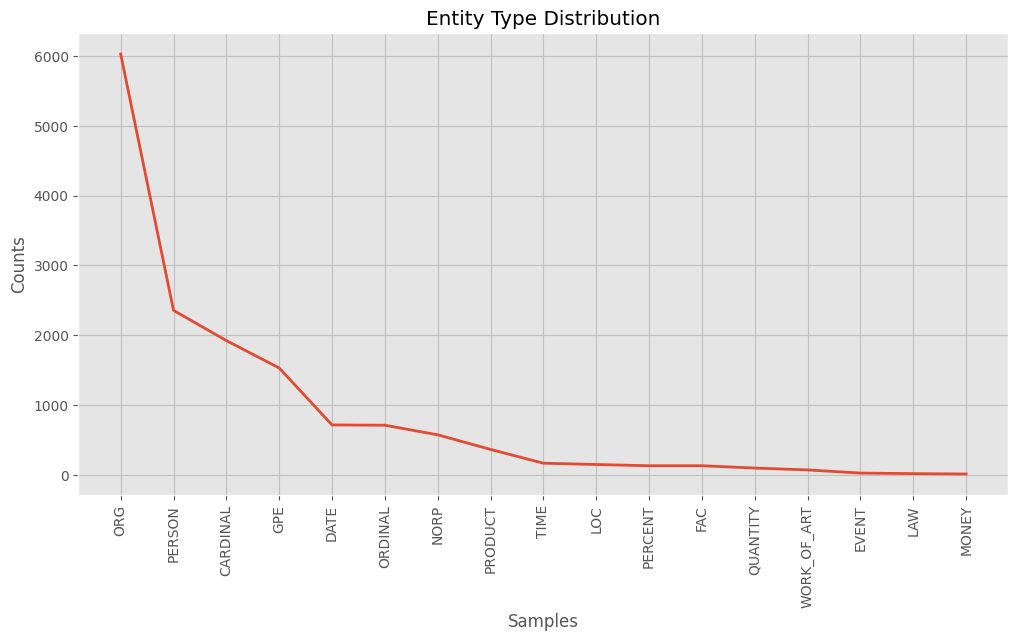

<Axes: title={'center': 'Entity Type Distribution'}, xlabel='Samples', ylabel='Counts'>

In [27]:
# Entity Type Distribution from spaCy
entity_types = [label for sublist in df['entities'] for _, label in sublist]
entity_freq_dist = FreqDist(entity_types)
plt.figure(figsize=(12, 6))
entity_freq_dist.plot(20, title='Entity Type Distribution')

In [28]:
# TSNE Visualization of TF-IDF Vectors
tfidf_array = tfidf_result.toarray() 
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_array)

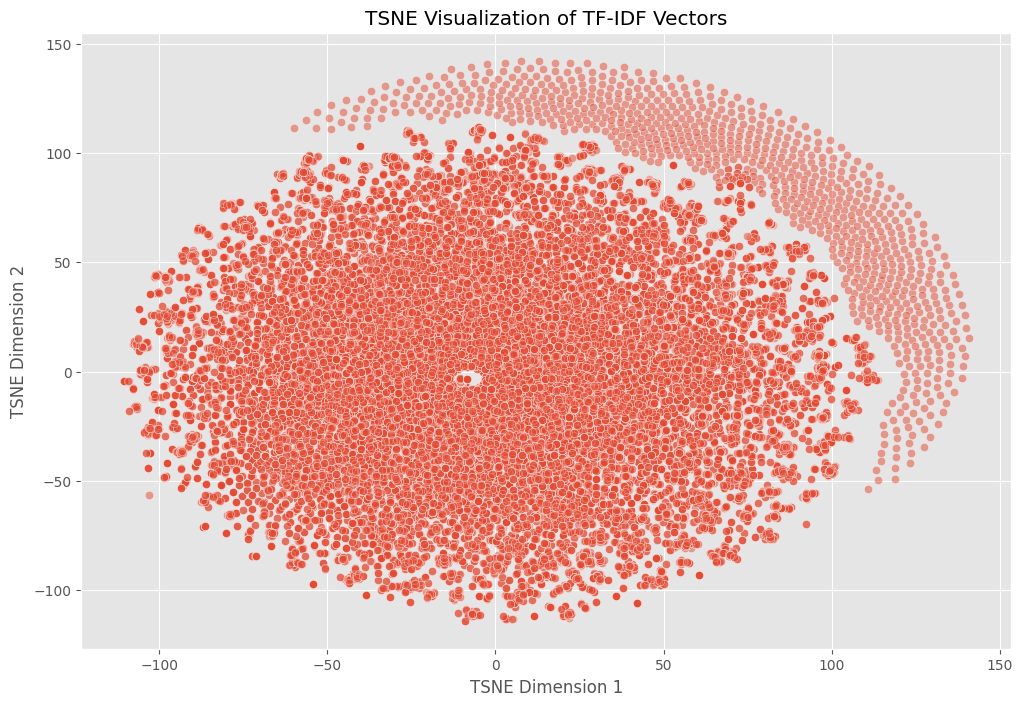

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], alpha=0.5)
plt.title('TSNE Visualization of TF-IDF Vectors')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.show()

In [30]:
# Heatmap of Top TF-IDF Features Across Documents
# Select top 10 TF-IDF features for visualization
top_n_features = tfidf_df.columns.tolist()[:10]
top_features_df = df[top_n_features]

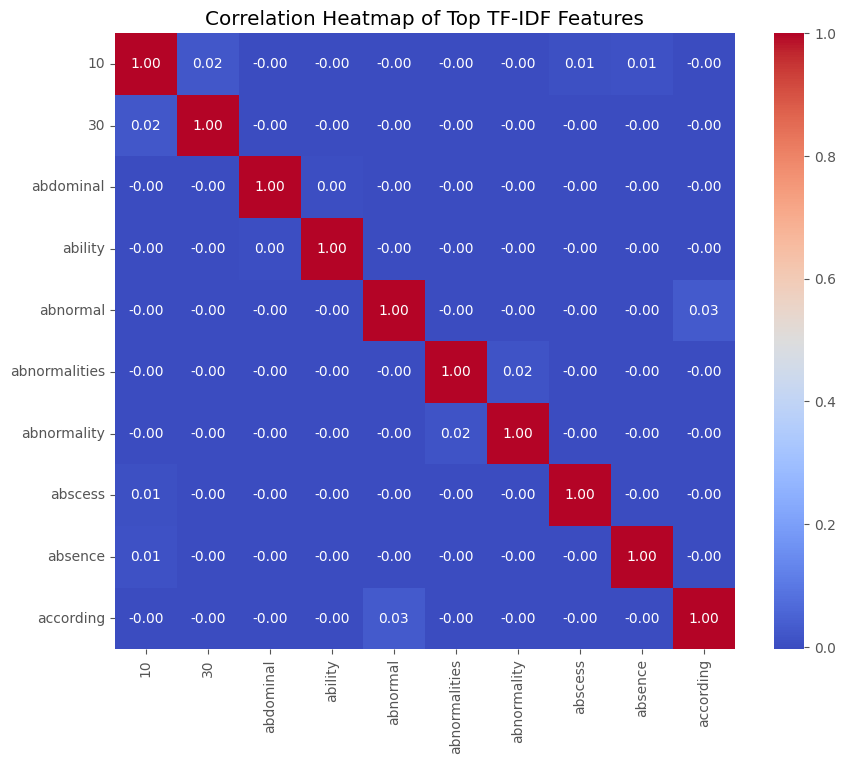

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(top_features_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Top TF-IDF Features')
plt.show()

In [33]:
pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 3.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [34]:
# Interactive Boxplot of Flesch Reading Ease by Entity Type
import plotly.express as px
df['max_entity_type'] = df['entities'].apply(lambda x: max(x, key=lambda y: y[1])[1] if x else 'None')

In [35]:
fig = px.box(df, x='max_entity_type', y='flesch_reading_ease', points="all",
             title='Boxplot of Flesch Reading Ease Scores by Entity Type')
fig.show()

In [36]:
# Barplot of Average Document Length by Top Entities
top_entities = [entity for entity, _ in entity_counts.most_common(5)]
df['doc_length'] = df['input'].apply(lambda x: len(x.split()))
average_length_by_entity = {entity: df[df['input'].str.contains(entity)]['doc_length'].mean() for entity in top_entities}

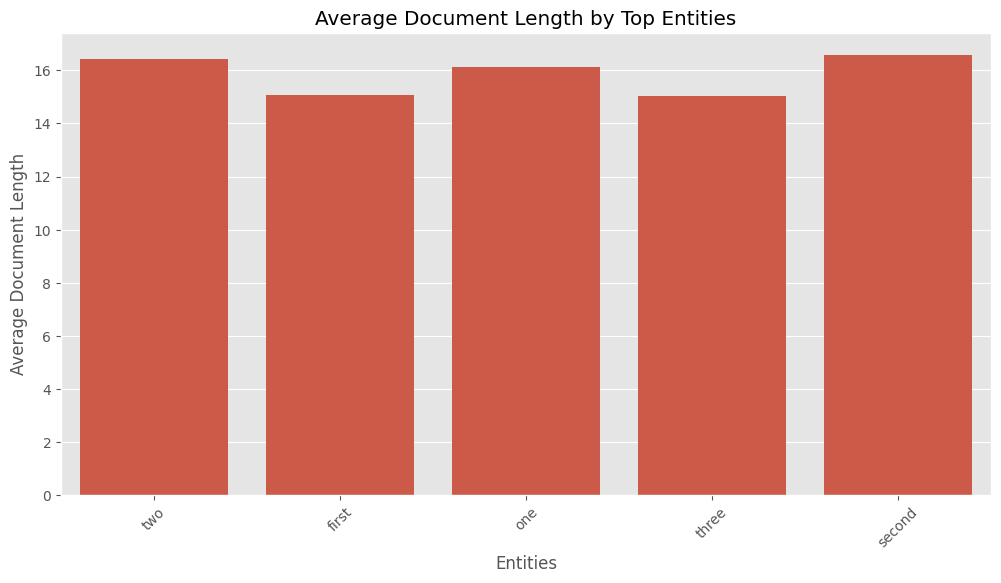

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(average_length_by_entity.keys()), y=list(average_length_by_entity.values()))
plt.title('Average Document Length by Top Entities')
plt.xlabel('Entities')
plt.ylabel('Average Document Length')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()